<a href="https://colab.research.google.com/github/alexguttlein/TP1-AnalisisExploratorioDeDatos/blob/main/TP1_An%C3%A1lisis_Exploratorio_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# según adobe es segura para cegueras varias
paleta = {'rojo': '#E0523C',
          'verde': '#3DE095',
          'azul': '#573DE0',
          'amarillo': '#E0CC3D',
          'negro': '#4E4B61',
          'blanco': 'fafafa',
          }

In [99]:
cleaned_reviews = pd.read_csv("https://raw.githubusercontent.com/alexguttlein/TP1-AnalisisExploratorioDeDatos/main/data/cleaned-reviews.csv",parse_dates=['date'])

In [100]:
customer_airways = pd.read_csv("https://raw.githubusercontent.com/alexguttlein/TP1-AnalisisExploratorioDeDatos/main/data/customer_airways_data.csv",encoding = "ISO-8859-1")

In [101]:
iata_apt_cod = pd.read_csv('https://raw.githubusercontent.com/alexguttlein/TP1-AnalisisExploratorioDeDatos/main/data/IATA_aeropuertos.csv')

In [102]:
cleaned_reviews.head()

,Unnamed: 0,reviews,rates,date,country,verified,comments
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...


In [103]:
customer_airways.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [104]:
customer_airways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

# **Análisis Cuantitativo**

---

In [105]:
#se realiza una copia del dataframe en donde solo se incluyen las variables cuantitativas para poder realizar un heatmap
customer_airways_cuant = customer_airways.copy()
customer_airways_cuant.drop(['route','booking_origin'], axis=1, inplace=True)

In [106]:
#veo los tipos de canales de venta para luego mapearlos
customer_airways_cuant['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [107]:
#mapeo valores cualitativos de sales_channel para poder analizarlos como numericos
#Internet = 0
#Mobile = 1
#Otro = -1

def mapear_sales_channel(canal):
  if(canal == 'Internet'):
    return 0
  elif(canal == 'Mobile'):
    return 1
  return -1

customer_airways_cuant['sales_channel'] = customer_airways_cuant.sales_channel.map(mapear_sales_channel)

In [108]:
#veo los tipos de modo de viaje para luego mapearlos
customer_airways_cuant.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [109]:
#mapeo valores cualitativos de trip_type para poder analizarlos como numericos
#RoundTrip = 0
#CircleTrip = 1
#OneWay = 2

def mapear_trip_type(tipo):
  if(tipo == 'RoundTrip'):
    return 0
  elif(tipo == 'CircleTrip'):
    return 1
  elif(tipo == 'OneWay'):
    return 2
  return -1

customer_airways_cuant['trip_type'] = customer_airways_cuant['trip_type'].map(mapear_trip_type)

In [110]:
customer_airways_cuant['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [111]:
#mapeo valores cualitativos de flight_day para poder analizarlos como numericos
#Mon = 0      Fri=4
#Tue = 1      Sat=5
#Wed = 2      Sun=6
#Thu = 3

def mapear_flight_day(day):
  if(day == 'Mon'):
    return 0
  elif(day == 'Tue'):
    return 1
  elif(day == 'Wed'):
    return 2
  elif(day == 'Thu'):
    return 3
  elif(day == 'Fri'):
    return 4
  elif(day == 'Sat'):
    return 5
  elif(day == 'Sun'):
    return 6
  return -1

customer_airways_cuant['flight_day'] = customer_airways_cuant['flight_day'].map(mapear_flight_day)

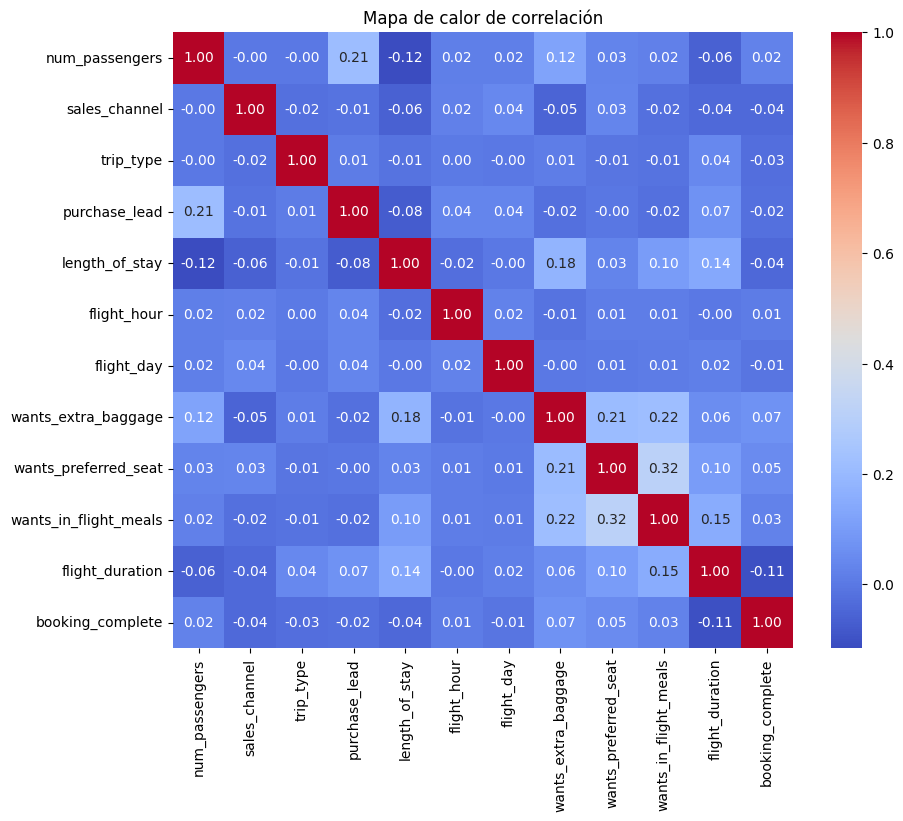

In [112]:
#se procede a realizar un heatmap para ver si existe alguna correlacion entre los diferentes campos y la confirmación de reserva
matriz_correlacion = customer_airways_cuant.corr()

#se realiza el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

En primera instancia las correlaciones mas significativas son entre los requisitos de asientos preferenciales (wants_in_flight_seat) y comida en vuelo (wants_in_flight_meals). Tambien se encuentra una leve correlación entre anticipación de reserva (purchase_lead) y número de pasajeros (num_passengers).

Pero en ninguno de los casos la correlación es lo suficientemente alta, siempre es debajo de 0,5.

# **Cantidad de reservas por tipo de vuelo**

---

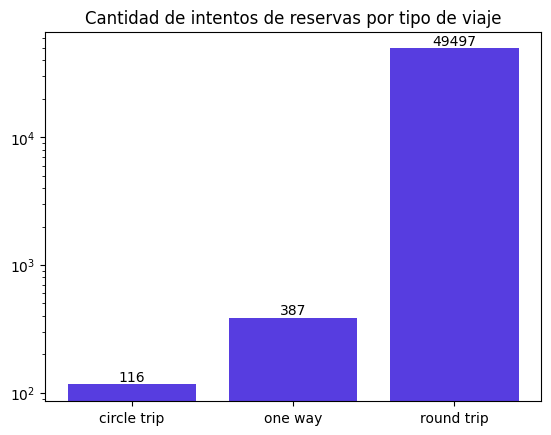

In [113]:
# Cantidad de intentos de reserva para cada tipo de viaje
tipo_viaje = customer_airways[['trip_type', 'booking_complete']]
cantidad_por_tipo_viaje = tipo_viaje.groupby('trip_type').count()

cantidad_por_tipo_viaje.rename(columns={'booking_complete': 'quantity'}, inplace=True)
cantidad_one_way = cantidad_por_tipo_viaje.loc['OneWay', 'quantity']
cantidad_circle_trip = cantidad_por_tipo_viaje.loc['CircleTrip', 'quantity']
cantidad_round_trip = cantidad_por_tipo_viaje.loc['RoundTrip', 'quantity']

fig, ax = plt.subplots()

bar_container = ax.bar(['circle trip', 'one way', 'round trip'],
                       [cantidad_circle_trip, cantidad_one_way, cantidad_round_trip], color = paleta['azul'])

ax.set_yscale('log')
ax.bar_label(bar_container)
plt.title('Cantidad de intentos de reservas por tipo de viaje')
plt.show()

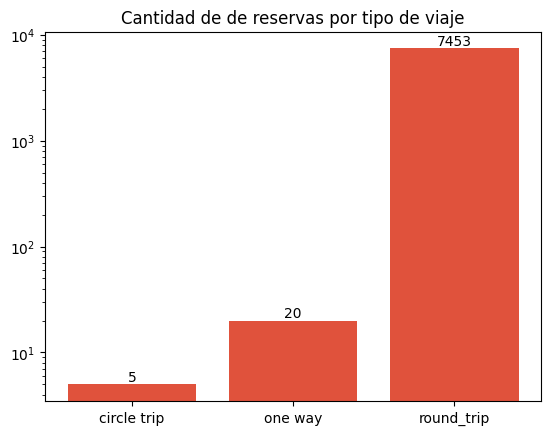

In [114]:
# cantidad de reservas completadas por tipo de viaje
tipo_viaje = customer_airways[['trip_type', 'booking_complete']]
cantidad_por_tipo_viaje = tipo_viaje.groupby('trip_type').sum('booking_complete')

cantidad_por_tipo_viaje.rename(columns={'booking_complete': 'quantity'}, inplace=True)
cantidad_one_way = cantidad_por_tipo_viaje.loc['OneWay', 'quantity']
cantidad_circle_trip = cantidad_por_tipo_viaje.loc['CircleTrip', 'quantity']
cantidad_round_trip = cantidad_por_tipo_viaje.loc['RoundTrip', 'quantity']


fig, ax = plt.subplots()

bar_container = ax.bar(['circle trip', 'one way', 'round_trip'],[cantidad_circle_trip, cantidad_one_way, cantidad_round_trip],
        color = paleta['rojo'])
ax.set_yscale('log')
ax.bar_label(bar_container)
ax.set_title('Cantidad de de reservas por tipo de viaje')
plt.show()

Se puede observar que la gran mayoría de los intentos de reserva y las reservas completadas son del tipo *round trip*.

# **Cantidad de reservas por canal de ventas**

---

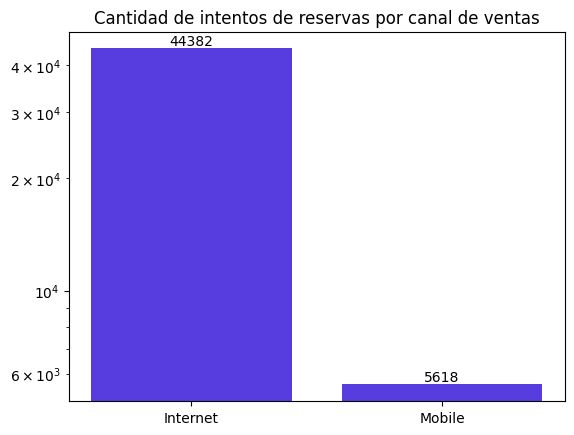

In [115]:
# Cantidad de intentos de reserva por cada canal de venta
canal_venta = customer_airways[['sales_channel', 'booking_complete']]
cantidad_por_canal_venta = canal_venta.groupby('sales_channel').count()

cantidad_por_canal_venta.rename(columns={'booking_complete': 'quantity'}, inplace=True)
cantidad_por_canal_venta
cantidad_internet = cantidad_por_canal_venta.loc['Internet', 'quantity']
cantidad_mobile = cantidad_por_canal_venta.loc['Mobile', 'quantity']

fig, ax = plt.subplots()

bar_container = ax.bar(['Internet', 'Mobile'],
                       [cantidad_internet, cantidad_mobile], color = paleta['azul'])

ax.set_yscale('log')
ax.bar_label(bar_container)
plt.title('Cantidad de intentos de reservas por canal de ventas')
plt.show()

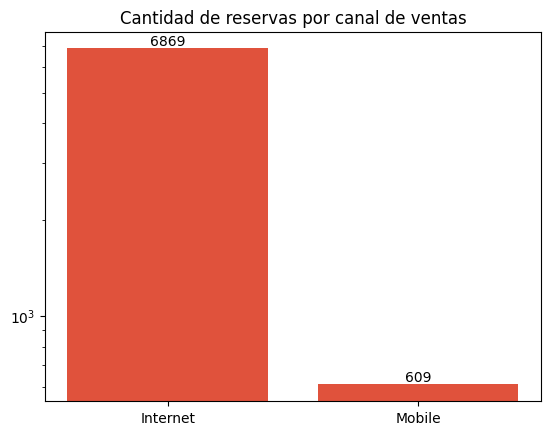

In [116]:
# Cantidad de reserva para cada canal de venta
canal_venta = customer_airways[['sales_channel', 'booking_complete']]
cantidad_por_canal_venta = canal_venta.groupby('sales_channel').sum('booking_complete')

cantidad_por_canal_venta.rename(columns={'booking_complete': 'quantity'}, inplace=True)
cantidad_por_canal_venta
cantidad_internet = cantidad_por_canal_venta.loc['Internet', 'quantity']
cantidad_mobile = cantidad_por_canal_venta.loc['Mobile', 'quantity']

fig, ax = plt.subplots()

bar_container = ax.bar(['Internet', 'Mobile'],
                       [cantidad_internet, cantidad_mobile], color = paleta['rojo'])

ax.set_yscale('log')
ax.bar_label(bar_container)
plt.title('Cantidad de reservas por canal de ventas')
plt.show()

Se puede observar que la gran mayoría de los intentos de reserva y las reservas se realizan por el canal _internet_.

# **Países qué más reservas realizan**

---

In [117]:
#se agrega una columna con el total de vuelos desde cada pais de origen
customer_airways['total_reservas_origen'] = customer_airways.groupby('booking_origin')['num_passengers'].transform('count')

In [118]:
#se agrega una columna con el total de pasajeros de cada origen VER SI HACE FALTA
customer_airways['Total pasajeros'] = customer_airways.groupby('booking_origin')['num_passengers'].transform('sum')

In [119]:
#paises origen que más buscan realizar una reserva y cuantas son realmente completadas
mas_reservas = customer_airways.groupby('booking_origin')['num_passengers'].count().sort_values(ascending=False).head(10)
mas_reservas

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Name: num_passengers, dtype: int64

In [120]:
#agrupo por pais origen, y veo cuantas reservas completadas tienen. Lo agrego en nueva columna
customer_airways["total_reservas_completadas"] = customer_airways.groupby('booking_origin')['booking_complete'].transform('sum')
customer_airways

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_reservas_origen,Total pasajeros,total_reservas_completadas
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,1074,1634,54
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,1074,1634,54
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,1270,2130,131
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1074,1634,54
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,1270,2130,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,17872,25831,900
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,17872,25831,900
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,17872,25831,900
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,17872,25831,900


In [121]:
#filtro por los 10 origenes que tienen mayor cantidad de reservas
mas_reservas = customer_airways[['booking_origin','total_reservas_origen','total_reservas_completadas']].sort_values(by='total_reservas_origen', ascending=False)
mas_reservas_filtrado = mas_reservas.drop_duplicates(subset=['booking_origin']).head(10).reset_index()

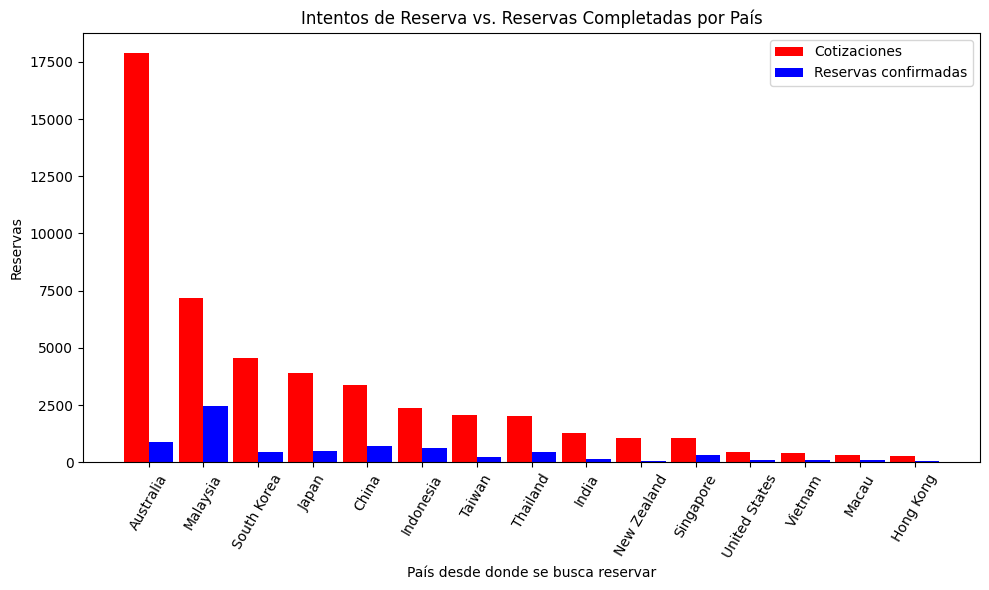

In [174]:
#grafico de barras donde se aprecia la cantidad de reservas completadas vs la cantidad de intentos de reserva desde cada origen.

#Ancho de las barras
bar_width = 0.45

# Definir la ubicación de las barras
index = range(len(mas_reservas_filtrado))

# Crear el gráfico de barras con barras dobles
plt.figure(figsize=(10, 6))
plt.bar(index, mas_reservas_filtrado['total_reservas_origen'], bar_width, label='Cotizaciones', color='#FF0000')
plt.bar([i + bar_width for i in index], mas_reservas_filtrado['total_reservas_completadas'], bar_width, label='Reservas confirmadas', color='#0000FF')

plt.xlabel('País desde donde se busca reservar')
plt.ylabel('Reservas')
plt.title('Intentos de Reserva vs. Reservas Completadas por País')
plt.xticks([i + bar_width / 2 for i in index], mas_reservas_filtrado['booking_origin'])
plt.xticks(rotation=60)
plt.legend()
plt.tight_layout()
plt.show()

In [123]:
#se agrega columna con el porcentaje de reservas completadas desde cada origen
mas_reservas['porcentaje_completadas'] = (mas_reservas['total_reservas_completadas'] * 100) / mas_reservas['total_reservas_origen']

In [124]:
#se filtran los origenes duplicados y se dejan los 15 con mayor cantidad de vuelos
mas_reservas_filtrado = mas_reservas.drop_duplicates(subset=['booking_origin']).head(15).reset_index()
mas_reservas_filtrado

,index,booking_origin,total_reservas_origen,total_reservas_completadas,porcentaje_completadas
0,25000,Australia,17872,900,5.035810
1,23092,Malaysia,7174,2468,34.402007
2,34726,South Korea,4559,462,10.133801
3,32209,Japan,3885,478,12.303732
4,26328,China,3387,694,20.490109
5,29946,Indonesia,2369,615,25.960321
6,29045,Taiwan,2077,224,10.784786
7,30791,Thailand,2030,470,23.152709
8,8855,India,1270,131,10.314961
9,2008,New Zealand,1074,54,5.027933


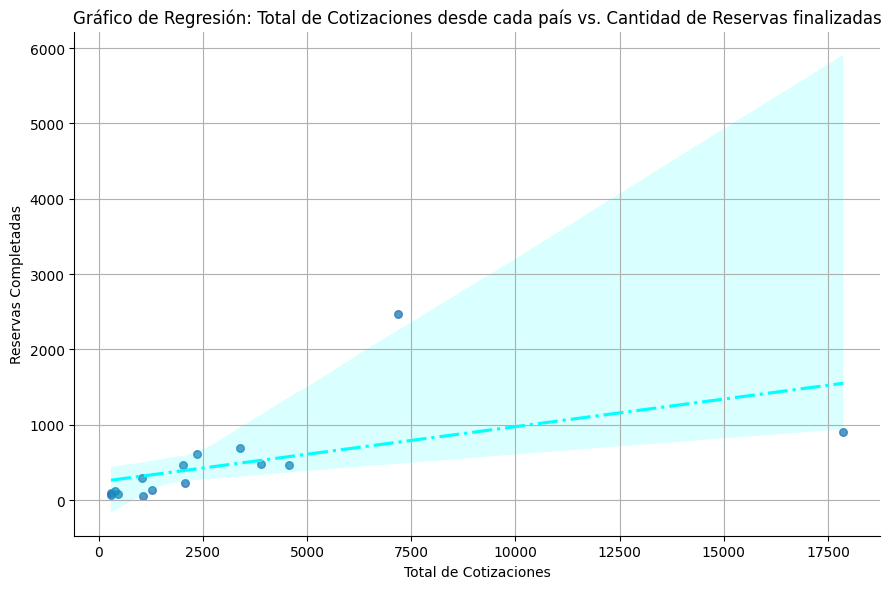

In [171]:
#se genera un gráfico de regresión para determinar si hay algo destacable en la relacion entre el origen de las reservas y la cantidad de reservas completadas.

sns.lmplot(x='total_reservas_origen', y='total_reservas_completadas', data=mas_reservas_filtrado, height=6, aspect=1.5, line_kws={'color':'cyan', 'linestyle': '-.'}, palette='pastel',
           scatter_kws={'alpha': 0.75, 's': 30})

plt.title('Gráfico de Regresión: Total de Cotizaciones desde cada país vs. Cantidad de Reservas finalizadas')
plt.xlabel('Total de Cotizaciones')
plt.ylabel('Reservas Completadas')
plt.grid(True)
plt.tight_layout()
plt.show()

***Conclusión:***

En el gráfico anterior, como uno esperaría, a mayor cantidad de intentos de reserva hay mayor cantidad de reservas completadas. En la mayoría de los países se ve una relación lineal, a excepción de dos casos especiales:

- Se puede ver que el origen desde el que más se intenta reservar (Australia) tiene una cantidad de reservas muy por debajo de lo esperado.

- Por el contrario se puede notar que la cantidad de reservas completadas es muy elevada en el siguiente origen con mayor cantidad de interés de reserva (Malasia).

<br>Podría considerarse que los habitantes de Malasia son más decididos a la hora de realizar una reserva. Esto podría servirle a la compañía para aumentar su publicidad en Malasia y tal vez también buscar incentivar a los Australianos para que elijan volar más con la compañía.

# Posible visu - tortas reserva top 10, complementa o reemplaza barras

In [126]:

datos = customer_airways[['booking_origin','total_reservas_origen','total_reservas_completadas']].sort_values(by='total_reservas_origen', ascending=False)
datos = datos.drop_duplicates(subset=['booking_origin']).head(10).reset_index()
datos['porcentaje_completadas'] = (datos['total_reservas_completadas'] * 100) / datos['total_reservas_origen']
datos = datos.drop_duplicates(subset=['booking_origin']).head(15).reset_index()
datos.sort_values(by='porcentaje_completadas', ascending=False, inplace=True)
datos.drop(columns=['level_0'], inplace=True)
datos = datos.reset_index()


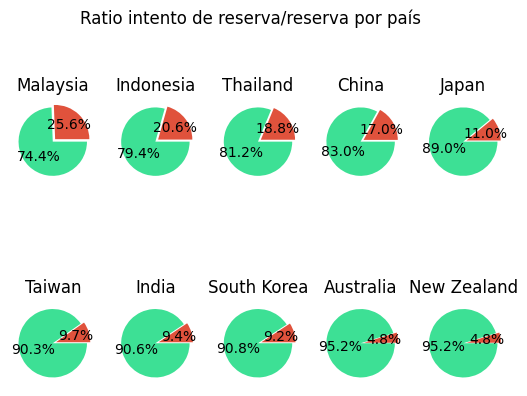

In [127]:
from matplotlib import pyplot as plt

for i in range(datos.shape[0]):
  plt.subplot(2, 5, i+1)
  plt.pie([datos.loc[i]['total_reservas_completadas'],datos.loc[i]['total_reservas_origen'] ],
          autopct='%1.1f%%', colors=[paleta['rojo'], paleta['verde']],
          explode=[0.1, 0])
  plt.title(datos.loc[i]['booking_origin'])

plt.suptitle('Ratio intento de reserva/reserva por país')
plt.show()

## Posible visu - mapamundi con paises que reservan





In [128]:
# ponerle los códigos iso a los países
codigos_iso = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')


nombre_y_codigo = codigos_iso[['name', 'alpha-3']]
nombre_y_codigo = nombre_y_codigo.rename(columns={'alpha-3': 'iso'})


world_map_data = customer_airways[['booking_origin','booking_complete']]
world_map_data = pd.merge(world_map_data, nombre_y_codigo, left_on='booking_origin', right_on='name')
world_map_data = world_map_data[['name', 'booking_complete', 'iso']]


# agrupar por pais y obtener la suma de completados
world_map_group = world_map_data.groupby(['name','iso']).sum('booking_complete').reset_index()

# dame las que tengan al menos 1 reserva
world_map_booking_complete = world_map_group[world_map_group['booking_complete']>0]
# renombrar columna para el plot
world_map_booking_complete = world_map_booking_complete.rename(columns={'booking_complete': 'completadas'})


import plotly.express as px


fig = px.choropleth(world_map_booking_complete, locations='iso', color='completadas',
                    color_continuous_scale="plasma",
                    projection='natural earth', title='Países que reservan')
fig.update_geos( coastlinecolor='#444', oceancolor='#0f0', lonaxis={'showgrid':True})
fig.show()



# **Rutas más solicitadas desde Malasia y Australia**

---

In [129]:
#se filtra dataset de codigos de aeropuerto para analizar sólo los que tienen 'booking_origin' Australia y Malasia
iata_aeropuertos = customer_airways.copy()
iata_aeropuertos = iata_aeropuertos.loc[(iata_aeropuertos['booking_origin'] == 'Australia') | (iata_aeropuertos['booking_origin'] == 'Malaysia')]

In [130]:
#se separan los codigos de aeropuertos contenidos en 'route'
iata_aeropuertos['origen'] = iata_aeropuertos['route'].str.slice(0, 3)
iata_aeropuertos['destino'] = iata_aeropuertos['route'].str.slice(3)

In [131]:
#se filtra el df para que solo contenga las columnas con los codigos de aeropuerto de origen y destino
iata_aeropuertos_filter = iata_aeropuertos[['booking_origin','route','origen','destino','booking_complete']]

In [132]:
#se combinan los codigos de aerpuerto del df original con un df con codigos de aeropuerto y ciudades
iata_aeropuertos_filter = pd.merge(iata_aeropuertos_filter, iata_apt_cod, left_on='origen', right_on='COD')
iata_aeropuertos_filter = pd.merge(iata_aeropuertos_filter, iata_apt_cod, left_on='destino', right_on='COD')

#se combinan ambos resultados para tener un nuevo campo con los ciudades de origen y destino en vez de los codigos
iata_aeropuertos_filter['ruta_completa'] = iata_aeropuertos_filter['CIUDAD_x'] + ' / ' + iata_aeropuertos_filter['CIUDAD_y']

In [133]:
#busco analizar si hay algun patron entre las rutas de las reservas completas y las incompletas de Malasia
malasia_reservas = iata_aeropuertos_filter.loc[iata_aeropuertos_filter['booking_origin'] == 'Malaysia',:]

#separo las reservas australianas entre completadas y no completadas
#completadas
malasia_reservas_ok = malasia_reservas.loc[malasia_reservas['booking_complete'] == 1,:].sort_values(by='route', ascending=True).reset_index()
malasia_reservas_ok = malasia_reservas_ok.drop('index', axis=1)

#no completadas
malasia_reservas_no = malasia_reservas.loc[malasia_reservas['booking_complete'] == 0,:].sort_values(by='route', ascending=True).reset_index()
malasia_reservas_no = malasia_reservas_no.drop('index', axis=1)

#agrego una columna con el total de veces que se repite cada ruta
malasia_reservas_ok['route_total'] = malasia_reservas_ok.groupby('route')['booking_complete'].transform('count')
malasia_reservas_no['route_total'] = malasia_reservas_no.groupby('route')['booking_complete'].transform('count')

#elimino las rutas duplicadas para que cada una solo aparezca una vez con su respectivo numero de repeticiones
malasia_reservas_ok = malasia_reservas_ok.drop_duplicates(subset=['route']).sort_values(by='route_total', ascending=False).reset_index()
malasia_reservas_ok = malasia_reservas_ok.drop('index',axis=1)

malasia_reservas_no = malasia_reservas_no.drop_duplicates(subset=['route']).sort_values(by='route_total', ascending=False).reset_index()
malasia_reservas_no = malasia_reservas_no.drop('index',axis=1)

#se toman las 10 rutas más consultadas para luego analizar el porcentaje de reservas completadas de cada una de estas
malasia_reservas_no = malasia_reservas_no.sort_values(by='route_total',ascending=False).head(10)
malasia_reservas_no = malasia_reservas_no[['booking_origin', 'route', 'route_total','ruta_completa']]

#se fusionan ambos datasets pero solo considerando las rutas más consultadas.
malasia_reservas_merge = pd.merge(malasia_reservas_no, malasia_reservas_ok, on='route', how='left')

#al dataset de las rutas más consultadas se le agrega una columna con el total de reservas completadas para cada ruta.
malasia_reservas_no['route_total_reserved'] = malasia_reservas_merge['route_total_y']

#se calcula el porcentaje de reservas completadas.
malasia_reservas_no['route_efectivity_average'] = (malasia_reservas_no['route_total_reserved'] / malasia_reservas_no['route_total']) * 100

#se ordenan las rutas por mayor porcentaje de efectividad
malasia_reservas_sorted = malasia_reservas_no.sort_values(by='route_efectivity_average', ascending=True)

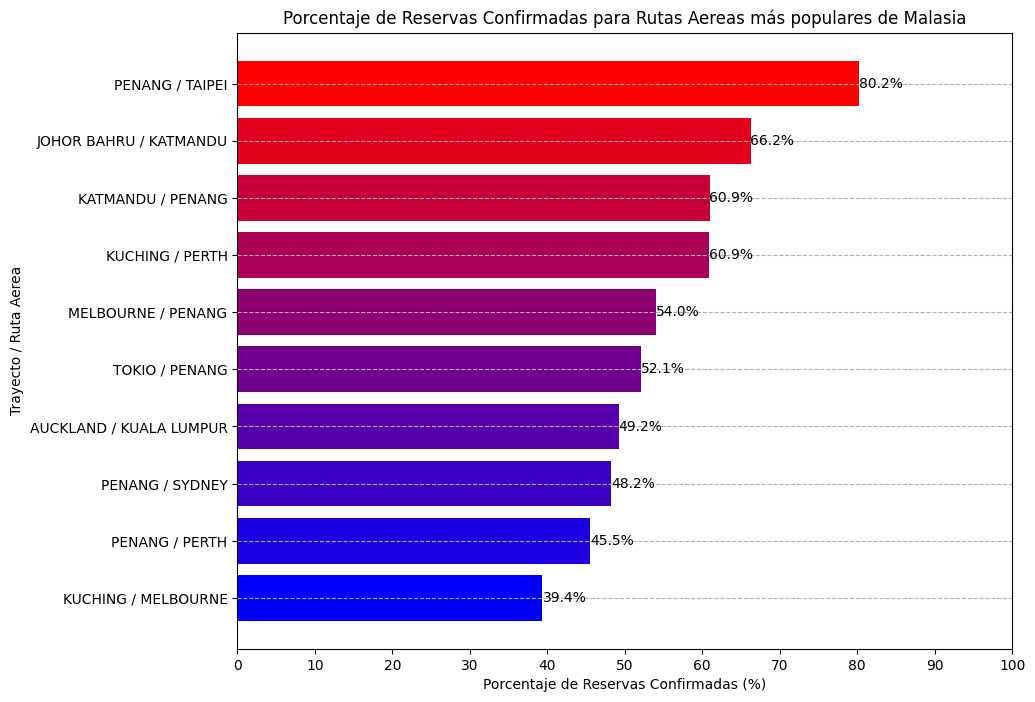

In [134]:
from matplotlib.colors import LinearSegmentedColormap

#colores = sns.color_palette(["#FF5733", "#3498DB"], n_colors=2)
colores = LinearSegmentedColormap.from_list('azul_rojo', ['#0000FF','#FF0000'], N=len(malasia_reservas_sorted))

plt.figure(figsize=(10, 8))
plt.barh(malasia_reservas_sorted['ruta_completa'], malasia_reservas_sorted['route_efectivity_average'], color=colores(range(len(malasia_reservas_sorted))))

#etiquetas y título
plt.xlabel('Porcentaje de Reservas Confirmadas (%)')
plt.ylabel('Trayecto / Ruta Aerea')
plt.title('Porcentaje de Reservas Confirmadas para Rutas Aereas más populares de Malasia')

#quitar grilla
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='')

#determinar valores del eje x
plt.xticks(range(0, 110, 10))

#se agregan los porcentajes
for index, value in enumerate(malasia_reservas_sorted['route_efectivity_average']):
    value = round(value,1)
    plt.text(value, index, f'{value}%', va='center')

plt.show()

In [135]:
#mismo analisis para Australia

#busco analizar si hay algun patron entre las rutas de las reservas completas y las incompletas de Malasia
australia_reservas = iata_aeropuertos_filter.loc[iata_aeropuertos_filter['booking_origin'] == 'Australia',:]

#separo las reservas australianas entre completadas y no completadas
#completadas
australia_reservas_ok = australia_reservas.loc[australia_reservas['booking_complete'] == 1,:].sort_values(by='route', ascending=True).reset_index()
australia_reservas_ok = australia_reservas_ok.drop('index', axis=1)

#no completadas
australia_reservas_no = australia_reservas.loc[australia_reservas['booking_complete'] == 0,:].sort_values(by='route', ascending=True).reset_index()
australia_reservas_no = australia_reservas_no.drop('index', axis=1)

#agrego una columna con el total de veces que se repite cada ruta
australia_reservas_ok['route_total'] = australia_reservas_ok.groupby('route')['booking_complete'].transform('count')
australia_reservas_no['route_total'] = australia_reservas_no.groupby('route')['booking_complete'].transform('count')

#elimino las rutas duplicadas para que cada una solo aparezca una vez con su respectivo numero de repeticiones
australia_reservas_ok = australia_reservas_ok.drop_duplicates(subset=['route']).sort_values(by='route_total', ascending=False).reset_index()
australia_reservas_ok = australia_reservas_ok.drop('index',axis=1)

australia_reservas_no = australia_reservas_no.drop_duplicates(subset=['route']).sort_values(by='route_total', ascending=False).reset_index()
australia_reservas_no = australia_reservas_no.drop('index',axis=1)

#se toman las 10 rutas más consultadas para luego analizar el porcentaje de reservas completadas de cada una de estas
australia_reservas_no = australia_reservas_no.sort_values(by='route_total',ascending=False).head(10)
australia_reservas_no = australia_reservas_no[['booking_origin', 'route', 'route_total','ruta_completa']]

#se fusionan ambos datasets pero solo considerando las rutas más consultadas.
australia_reservas_merge = pd.merge(australia_reservas_no, australia_reservas_ok, on='route', how='left')

#al dataset de las rutas más consultadas se le agrega una columna con el total de reservas completadas para cada ruta.
australia_reservas_no['route_total_reserved'] = australia_reservas_merge['route_total_y']

#se calcula el porcentaje de reservas completadas.
australia_reservas_no['route_efectivity_average'] = (australia_reservas_no['route_total_reserved'] / australia_reservas_no['route_total']) * 100

#se ordenan las rutas por mayor porcentaje de efectividad
australia_reservas_sorted = australia_reservas_no.sort_values(by='route_efectivity_average', ascending=True)

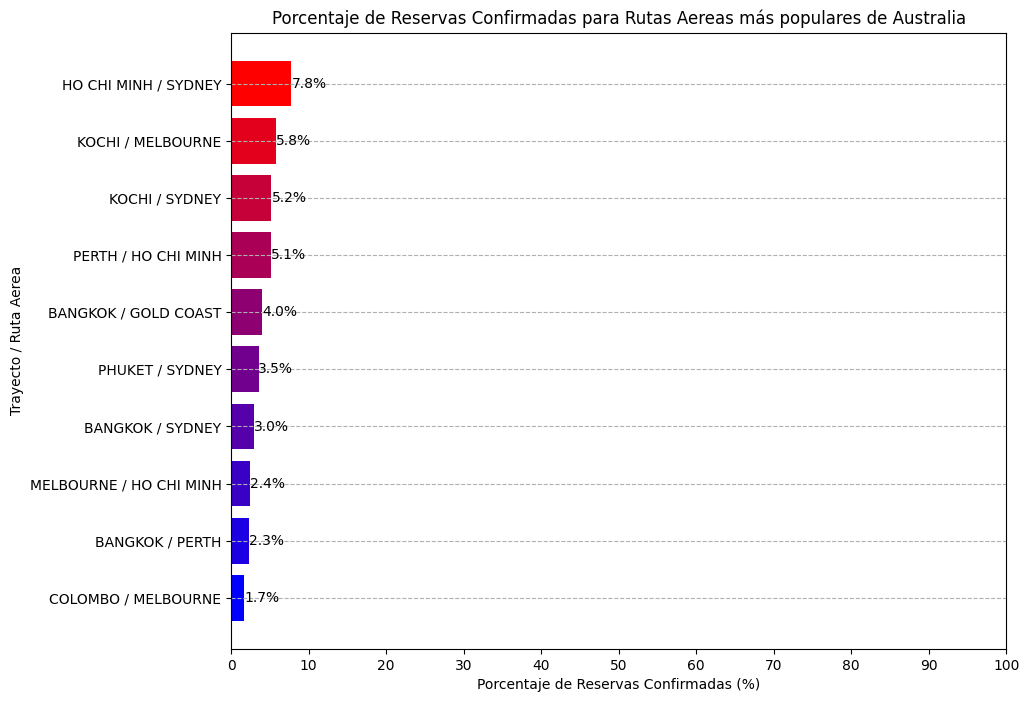

In [136]:
colores = LinearSegmentedColormap.from_list('azul_rojo', ['#0000FF','#FF0000'], N=len(australia_reservas_sorted))

plt.figure(figsize=(10, 8))
plt.barh(australia_reservas_sorted['ruta_completa'], australia_reservas_sorted['route_efectivity_average'], color=colores(range(len(australia_reservas_sorted))))

#etiquetas y título
plt.xlabel('Porcentaje de Reservas Confirmadas (%)')
plt.ylabel('Trayecto / Ruta Aerea')
plt.title('Porcentaje de Reservas Confirmadas para Rutas Aereas más populares de Australia')

#quitar grilla
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='')

#determinar valores del eje x
plt.xticks(range(0, 110, 10))

#se agregan los porcentajes
for index, value in enumerate(australia_reservas_sorted['route_efectivity_average']):
    value = round(value,1)
    plt.text(value, index, f'{value}%', va='center')

plt.show()

***Colclusión:***
<br>Se puede ver claramente la diferencia de efectividad entre ambos países.
En las rutas más reservadas desde ***Malasia*** la mayor parte ***supera el 50%*** de reservas confirmadas, mientras que desde ***Australia*** todas las confirmaciones están por ***debajo del 10%***.            
<br>Algunas de las conclusiones que podrían obtenerse con este análisis podrían ser que los Australianos son más indecisos a la hora de realizar reservas; también podría deberse a que existe otra aerolínea que hace los mismos recorridos que solicitan los Australianos pero a menor precio.

# Posible visu - flujo entre paises con destinos más populares

---

In [137]:
codigo_y_pais = pd.read_csv('https://raw.githubusercontent.com/alexguttlein/TP1-AnalisisExploratorioDeDatos/main/data/codigo_iso_2_y_3_name_iata_code.csv')

rutas = customer_airways[['route']].copy() # para evitar SettingWithCopyWarning:
rutas['origen'] = rutas['route'].str[:3]
rutas['destino'] = rutas['route'].str[3:]

rutas_con_pais_origen = pd.merge(rutas, codigo_y_pais, left_on='origen', right_on='iata_code')
rutas_con_pais_origen = rutas_con_pais_origen.drop(['alpha-2', 'alpha-3', 'iata_code'], axis='columns')
rutas_con_pais_origen = rutas_con_pais_origen.rename(columns={'name': 'pais_origen', 'iso_country': 'iso_origen'})

rutas_con_pais_origen_y_destino = pd.merge(rutas_con_pais_origen, codigo_y_pais, left_on='destino', right_on='iata_code')
rutas_con_pais_origen_y_destino = rutas_con_pais_origen_y_destino.drop(['alpha-2', 'alpha-3', 'iata_code'], axis='columns')
rutas_con_pais_origen_y_destino = rutas_con_pais_origen_y_destino.rename(columns={'name': 'pais_destino', 'iso_country':'iso_destino', 'iso_country_y': 'iso_destino'})

pais_origen_destino_agrupado = rutas_con_pais_origen_y_destino.groupby(['pais_origen', 'pais_destino']).count().reset_index().sort_values(by='destino',ascending=False).head(10)
pais_origen_destino_agrupado = pais_origen_destino_agrupado.rename(columns={'route': 'cantidad'})
pais_origen_destino_agrupado = pais_origen_destino_agrupado.drop(['origen', 'destino', 'iso_origen', 'iso_destino'], axis=1)

import pandas as pd
# lista de paises
pao = pais_origen_destino_agrupado['pais_origen']
pad = pais_origen_destino_agrupado['pais_destino']

pao_pad = pd.concat([pao, pad], axis=0).drop_duplicates()
pao_pad = pao_pad.reset_index()
pao_pad = pao_pad.rename(columns={0: 'country'})
pao_pad['index'] = [i for i in range(pao_pad.shape[0])]

paises_unicos_con_posicion = pao_pad

paises_origen_unicos = pais_origen_destino_agrupado['pais_origen'].drop_duplicates()

paises_destino_unicos = pais_origen_destino_agrupado['pais_destino'].drop_duplicates()


etiquetas_paises_origen = paises_origen_unicos.to_list()

etiquetas_paises_destino = paises_destino_unicos.to_list()


pais_origen_destino_agrupado_con_index_origen = pd.merge(
    pais_origen_destino_agrupado, paises_unicos_con_posicion,
    left_on='pais_origen', right_on='country'
)
pais_origen_destino_agrupado_con_index_origen.rename(columns={'index': 'index_origen'}, inplace=True)
pais_origen_destino_agrupado_con_index_origen.drop(columns=['country'], inplace=True)

pais_origen_destino_agrupado_con_indexes = pd.merge(
    pais_origen_destino_agrupado_con_index_origen, paises_unicos_con_posicion,
    left_on='pais_destino', right_on='country'
)

pais_origen_destino_agrupado_con_indexes.rename(columns={'index': 'index_destino'}, inplace=True)
pais_origen_destino_agrupado_con_indexes.drop(columns=['country'], inplace=True)

pais_origen_destino_agrupado_con_indexes['index_destino_desplazado'] = pais_origen_destino_agrupado_con_indexes['index_destino'] + len(paises_unicos_con_posicion)

lista_etiquetas = paises_unicos_con_posicion['country'].to_list() + paises_unicos_con_posicion['country'].to_list()

lista_origenes = pais_origen_destino_agrupado_con_indexes['index_origen'].to_list()

lista_destinos = pais_origen_destino_agrupado_con_indexes['index_destino_desplazado'].to_list()

lista_valores = pais_origen_destino_agrupado_con_indexes['cantidad'].to_list()

import plotly.graph_objects as go


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 50,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = lista_etiquetas,
      color = paleta['verde']
    ),
    link = dict(
      source = lista_origenes,
      target = lista_destinos,
      value = lista_valores
  ))])

fig.update_layout(title={
            'text' : 'Destinos populares',
            'x':0.5,
            'xanchor': 'left'
        }, font_size=18)
fig.show()

# **Reviews de Pasajeros**

---

In [138]:
cleaned_reviews_country = cleaned_reviews.copy()

cleaned_reviews_country.groupby('country')['rates'].count().sort_values(ascending=False).head(25).reset_index()
cleaned_reviews_country.drop(['Unnamed: 0', 'date', 'reviews', 'comments'], axis=1, inplace=True)

cleaned_reviews_country.groupby('country')['rates'].count().sort_values(ascending=False).head(25).reset_index()

,country,rates
0,United Kingdom,2165
1,United States,361
2,Australia,147
3,Canada,104
4,Germany,60
5,Switzerland,37
6,South Africa,37
7,Ireland,36
8,Netherlands,32
9,Singapore,27


Una curiosidad es que ***Malasia***, siendo el país origen con ***mayor cantidad de reservas completadas, no aparece entre los principales*** países que dejan reseñas.

## Reviews de usuarios verificados vs. no verificados

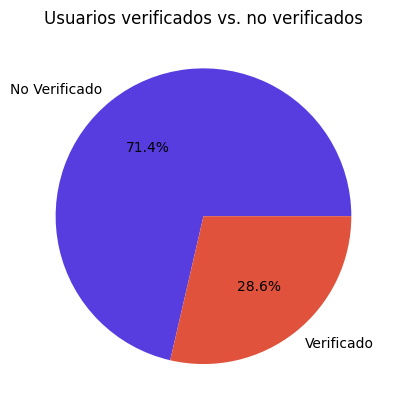

In [139]:
# cantidad de verificados vs sin verificar
columnas_reviews = cleaned_reviews[['rates', 'verified']]
g = columnas_reviews.groupby('verified').count()
g.reset_index()

plt.pie([g.loc[False, 'rates'], g.loc[True, 'rates']],
        labels=['No Verificado', 'Verificado'], colors = [paleta['azul'], paleta['rojo']],
        autopct='%1.1f%%')
plt.title('Usuarios verificados vs. no verificados')
plt.show()

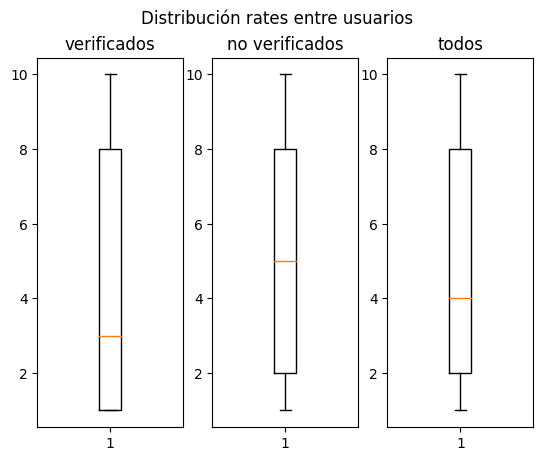

In [140]:
# vemos si hay alguna relación entre usuarios verificados y el rate que dejan
verificados = cleaned_reviews.loc[cleaned_reviews['verified']==True, 'rates']
no_verificados = cleaned_reviews.loc[cleaned_reviews['verified']==False, 'rates']
general = cleaned_reviews['rates']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

ax1.boxplot(verificados)
ax1.set_title('verificados')

ax2.boxplot(no_verificados)
ax2.set_title('no verificados')

ax3.boxplot(general)
ax3.set_title('todos')

plt.suptitle('Distribución rates entre usuarios')
plt.show()

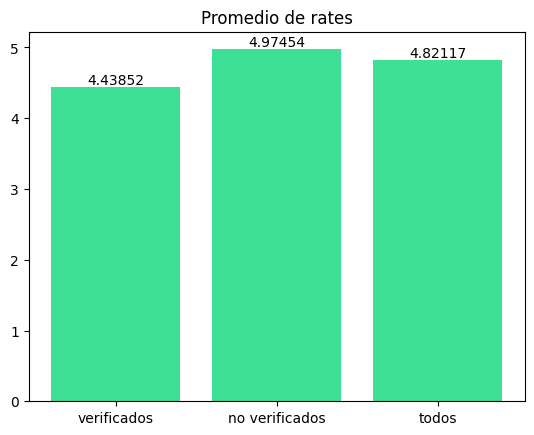

In [141]:
# ver promedio reviews segun verificado o no
promedio_verificado = cleaned_reviews.loc[cleaned_reviews['verified']==True, 'rates'].mean()
promedio_no_verificado = cleaned_reviews.loc[cleaned_reviews['verified']==False, 'rates'].mean()

promedio_general = cleaned_reviews['rates'].mean()

fig, ax = plt.subplots()

bar_container = ax.bar(['verificados', 'no verificados', 'todos'],
                       [promedio_verificado, promedio_no_verificado, promedio_general],
                       color=paleta['verde'])

ax.bar_label(bar_container)


plt.title('Promedio de rates')
plt.show()

Podemos afirmar que hay más *reviews* de usuarios no verificados y que suelen dar mejor *rate* que los verificados.

##**Calificaciones (Rates)**

In [148]:
cleaned_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3411 non-null   int64         
 1   reviews     3411 non-null   object        
 2   rates       3411 non-null   int64         
 3   date        3411 non-null   datetime64[ns]
 4   country     3411 non-null   object        
 5   verified    3411 non-null   bool          
 6   comments    3411 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(3)
memory usage: 163.3+ KB


In [149]:
#se agrega una columna con la cantidad de veces que aparece cada país
cleaned_reviews['total_country'] = cleaned_reviews.groupby('country')['comments'].transform('count')
cleaned_reviews['total_rate'] = cleaned_reviews.groupby('country')['rates'].transform('sum')
cleaned_reviews['total_verified'] = cleaned_reviews.groupby('country')['verified'].transform('sum')

#se crea nuevo dataset sin duplicidad de paises
unique_countries = cleaned_reviews.drop_duplicates(subset='country')

**Calificaciones Generales**

In [150]:
cleaned_reviews['rates'].describe()

count    3411.000000
mean        4.821167
std         3.145863
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: rates, dtype: float64

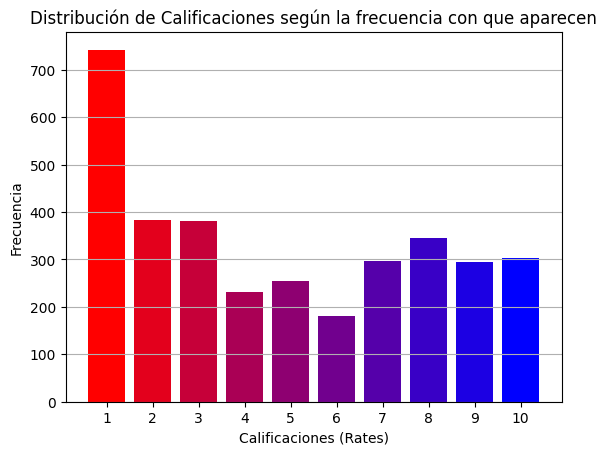

In [151]:
from matplotlib.colors import LinearSegmentedColormap

#gráfico de barras que muestra la distribución de las calificaciones (rates) según su frecuencia

bar_rates = cleaned_reviews['rates'].value_counts().sort_index()
colores = LinearSegmentedColormap.from_list('rojo_azul', ['#FF0000', '#0000FF'], N=len(bar_rates))
plt.bar(bar_rates.index, bar_rates.values, color=colores(range(len(bar_rates))))

plt.xlabel('Calificaciones (Rates)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones según la frecuencia con que aparecen')

plt.grid(axis='y')
plt.xticks(range(1, 11))
plt.show()

**Calificaciones de pasajeros de Australia**

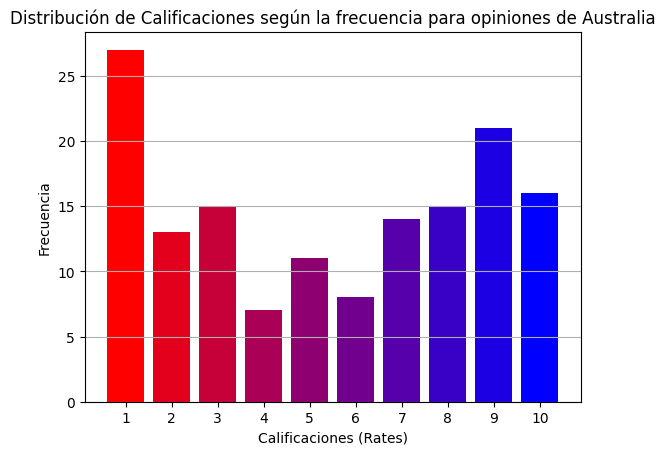

In [152]:
#gráfico de barras que muestra la distribución de las calificaciones (rates) según su frecuencia para Australia
cleaned_reviews_mal = cleaned_reviews.loc[cleaned_reviews['country'] == 'Australia',:]

bar_rates_mal = cleaned_reviews_mal['rates'].value_counts().sort_index()
colores = LinearSegmentedColormap.from_list('rojo_azul', ['#FF0000', '#0000FF'], N=len(bar_rates_mal))
plt.bar(bar_rates_mal.index, bar_rates_mal.values, color=colores(range(len(bar_rates_mal))))

plt.xlabel('Calificaciones (Rates)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones según la frecuencia para opiniones de Australia')

plt.grid(axis='y')
plt.xticks(range(1, 11))
plt.show()

**Calificaciones de pasajeros de Malasia**

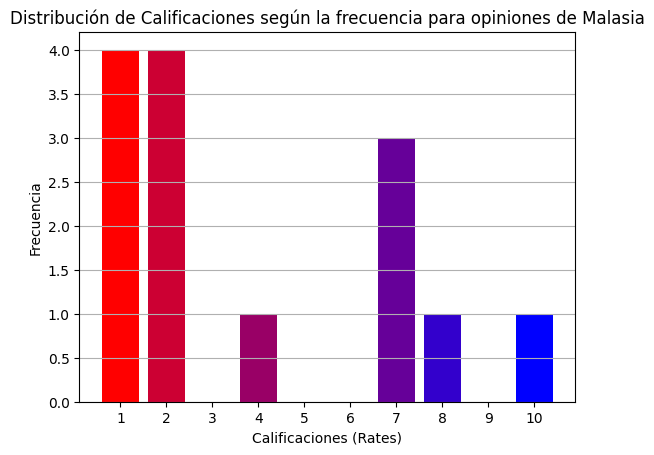

In [153]:
#gráfico de barras que muestra la distribución de las calificaciones (rates) según su frecuencia para Malasia
cleaned_reviews_mal = cleaned_reviews.loc[cleaned_reviews['country'] == 'Malaysia',:]

bar_rates_mal = cleaned_reviews_mal['rates'].value_counts().sort_index()
colores = LinearSegmentedColormap.from_list('rojo_azul', ['#FF0000', '#0000FF'], N=len(bar_rates_mal))
plt.bar(bar_rates_mal.index, bar_rates_mal.values, color=colores(range(len(bar_rates_mal))))

plt.xlabel('Calificaciones (Rates)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones según la frecuencia para opiniones de Malasia')

plt.grid(axis='y')
plt.xticks(range(1, 11))
plt.show()

**Calificaciones de pasajeros de Reino Unido**

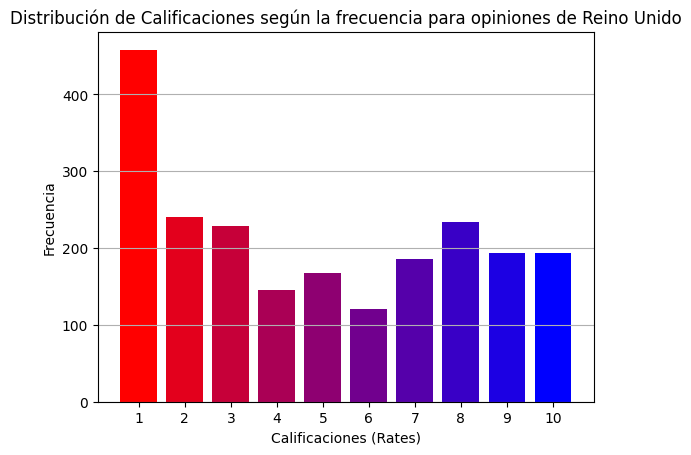

In [154]:
#gráfico de barras que muestra la distribución de las calificaciones (rates) según su frecuencia para Reino Unido
cleaned_reviews_uk = cleaned_reviews.loc[cleaned_reviews['country'] == 'United Kingdom',:]

bar_rates_uk = cleaned_reviews_uk['rates'].value_counts().sort_index()
colores = LinearSegmentedColormap.from_list('rojo_azul', ['#FF0000', '#0000FF'], N=len(bar_rates_uk))
plt.bar(bar_rates_uk.index, bar_rates_uk.values, color=colores(range(len(bar_rates_uk))))

plt.xlabel('Calificaciones (Rates)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones según la frecuencia para opiniones de Reino Unido')

plt.grid(axis='y')
plt.xticks(range(1, 11))
plt.show()

***Conclusión:***
<br>Se puede observar una ***disconformidad general*** de los pasajeros al ver que la mayoría de las ***calificaciones son bajas***. Se deberá analizar si se detecta algún patrón específico que determinen el sector de la población que calificó de esta manera.
<br><br>De todas formas, se puede encontrar una ***contradicción*** con el análisis anterior en donde se veía que en los comentarios ***predominaban las palabras positivas***.

##**Opiniones más populares**


In [142]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
cleaned_reviews_comments = cleaned_reviews[['reviews', 'comments', 'country', 'rates']]

In [144]:
#se setean las stopwords
stop_words = set(stopwords.words('english'))

#se agregan signos de puntuación a modo de stopwords
stop_words_extra = ['.', ',', '-', "'", '?',')','(']

#se agrega listado de palabras populares para determinar si una opinión es buena/mala
good_bad_words = ['good', 'great', 'excellent', 'wonderful', 'fantastic', 'amazing', 'outstanding', 'terrific', 'awesome', 'fabulous', 'superb', 'perfect', 'top-notch', 'impressive', 'phenomenal', 'bad', 'poor', 'terrible', 'awful', 'horrible', 'disappointing', 'mediocre', 'subpar', 'unacceptable', 'unsatisfactory', 'lousy', 'abysmal', 'dreadful', 'inferior', 'not good','ok','regular','normal','fine']

**Opiniones más frecuentes de Australia**

[('good', 95), ('excellent', 38), ('great', 27), ('poor', 18), ('fine', 18), ('ok', 17), ('awful', 10), ('wonderful', 6), ('terrible', 5), ('lousy', 5), ('fantastic', 4), ('horrible', 4), ('outstanding', 4), ('superb', 3), ('bad', 3), ('disappointing', 3), ('dreadful', 2), ('unsatisfactory', 2), ('perfect', 2), ('amazing', 2), ('mediocre', 2), ('normal', 1), ('regular', 1), ('abysmal', 1)]


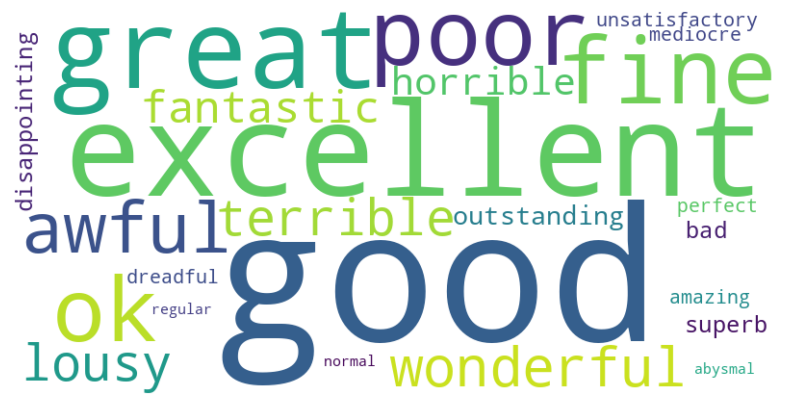

In [145]:
cleaned_reviews_comments_aus = cleaned_reviews_comments.loc[cleaned_reviews_comments['country'] == 'Australia',:]

#tokenizo las palabras de las reviews
all_words_aus = ' '.join(cleaned_reviews_comments_aus['comments']).lower()
tokens_aus = word_tokenize(all_words_aus, language='english')

#elimino las stopwords de los tokens
tokens_sin_stopwords_aus = []
for palabra in tokens_aus:
  if palabra not in stop_words:
    tokens_sin_stopwords_aus.append(palabra)

#creo lista con las palabras buenas/malas que aparecen
good_bad_aus = []
for p in tokens_sin_stopwords_aus:
  if p in good_bad_words:
    good_bad_aus.append(p)

#se cuenta la frecuencia de cada palabra
word_freq_aus = Counter(good_bad_aus)
print(word_freq_aus.most_common())

#se realiza un wordcloud con las palabras mas frecuentes
wordcloud_aus = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=word_freq_aus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_aus, interpolation='bilinear')
plt.axis('off')
plt.show()

**Opiniones más frecuentes de Malasia**

[('good', 7), ('poor', 3), ('mediocre', 2), ('wonderful', 2), ('excellent', 2), ('regular', 1), ('fine', 1), ('horrible', 1), ('awful', 1), ('ok', 1), ('disappointing', 1)]


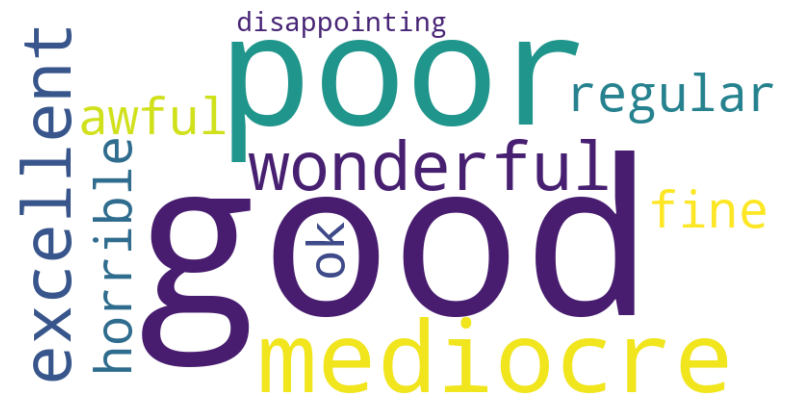

In [146]:
cleaned_reviews_comments_mal = cleaned_reviews_comments.loc[cleaned_reviews_comments['country'] == 'Malaysia',:]

#tokenizo las palabras de las reviews
all_words_mal = ' '.join(cleaned_reviews_comments_mal['comments']).lower()
tokens_mal = word_tokenize(all_words_mal, language='english')

#elimino las stopwords de los tokens
tokens_sin_stopwords_mal = []
for palabra in tokens_mal:
  if palabra not in stop_words:
    tokens_sin_stopwords_mal.append(palabra)

#creo lista con las palabras buenas/malas que aparecen
good_bad_mal = []
for p in tokens_sin_stopwords_mal:
  if p in good_bad_words:
    good_bad_mal.append(p)

#se cuenta la frecuencia de cada palabra
word_freq_mal = Counter(good_bad_mal)
print(word_freq_mal.most_common())

#se realiza un wordcloud con las palabras mas frecuentes
wordcloud_mal = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=word_freq_mal)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_mal, interpolation='bilinear')
plt.axis('off')
plt.show()

**Opiniones más frecuentes de Reino Unido**

[('good', 1280), ('poor', 432), ('great', 391), ('excellent', 345), ('ok', 283), ('fine', 226), ('bad', 190), ('awful', 142), ('disappointing', 102), ('terrible', 93), ('fantastic', 63), ('regular', 53), ('superb', 52), ('dreadful', 51), ('mediocre', 47), ('amazing', 46), ('normal', 46), ('horrible', 40), ('wonderful', 40), ('outstanding', 39), ('unacceptable', 31), ('perfect', 24), ('inferior', 19), ('abysmal', 18), ('impressive', 12), ('lousy', 9), ('fabulous', 8), ('terrific', 7), ('unsatisfactory', 4), ('phenomenal', 1), ('subpar', 1)]


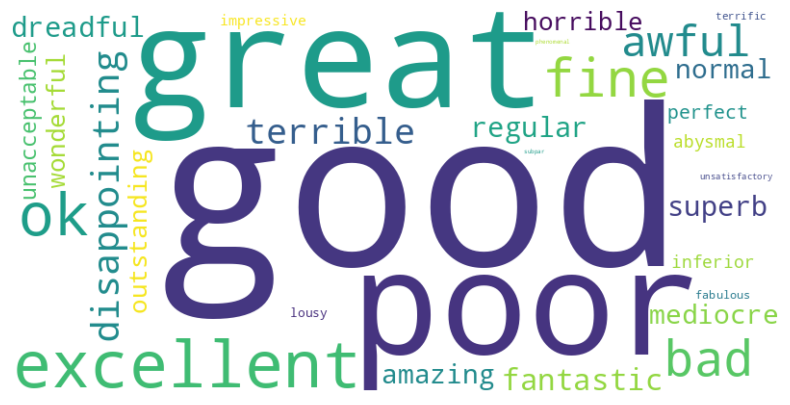

In [147]:
cleaned_reviews_comments_uk = cleaned_reviews_comments.loc[cleaned_reviews_comments['country'] == 'United Kingdom',:]

#tokenizo las palabras de las reviews
all_words_uk = ' '.join(cleaned_reviews_comments_uk['comments']).lower()
tokens_uk = word_tokenize(all_words_uk, language='english')

#elimino las stopwords de los tokens
tokens_sin_stopwords_uk = []
for palabra in tokens_uk:
  if palabra not in stop_words:
    tokens_sin_stopwords_uk.append(palabra)

#creo lista con las palabras buenas/malas que aparecen
good_bad_uk = []
for p in tokens_sin_stopwords_uk:
  if p in good_bad_words:
    good_bad_uk.append(p)

#se cuenta la frecuencia de cada palabra
word_freq_uk = Counter(good_bad_uk)
print(word_freq_uk.most_common())

#se realiza un wordcloud con las palabras mas frecuentes
wordcloud_uk = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=word_freq_uk)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_uk, interpolation='bilinear')
plt.axis('off')
plt.show()

***Conclusión:***
<br>Para los 3 países que se consideraron ***más relevantes*** (***Australia***: mayor cantidad de cotizaciones; ***Malasia***: mayor cantidad de reservas confirmadas; ***Reino Unido***: país con más reviews), se puede apreciar que la opinión más frecuente fue **GOOD (bueno)**, por lo que se puede considerar que la aerolínea está bien vista para el público.

##**Evolución de Calificaciones a través de los años**

In [155]:
#se calcula cómo fueron evolucionando las calificaciones a traves del tiempo
#generales (verificadas + no verificadas)
rates_by_date = cleaned_reviews[['date', 'rates']]

rates_by_date_grouped = rates_by_date.groupby([rates_by_date['date'].dt.year.rename('año'), rates_by_date['date'].dt.month.rename('mes')]).mean()
rates_by_date_grouped = rates_by_date_grouped.reset_index()
rates_by_date_grouped

,año,mes,date,rates
0,2014,5,2014-05-23 11:22:06.315789568,5.421053
1,2014,6,2014-06-13 08:32:52.602739712,6.493151
2,2014,7,2014-07-18 16:08:43.636363520,5.963636
3,2014,8,2014-08-18 00:36:55.384615424,5.538462
4,2014,9,2014-09-13 01:07:30.000000000,5.296875
...,...,...,...,...
99,2022,9,2022-09-15 16:00:00.000000000,5.166667
100,2022,10,2022-10-20 04:34:17.142857216,5.000000
101,2022,11,2022-11-18 19:38:10.909090816,3.636364
102,2022,12,2022-12-17 17:08:34.285714176,3.571429


(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

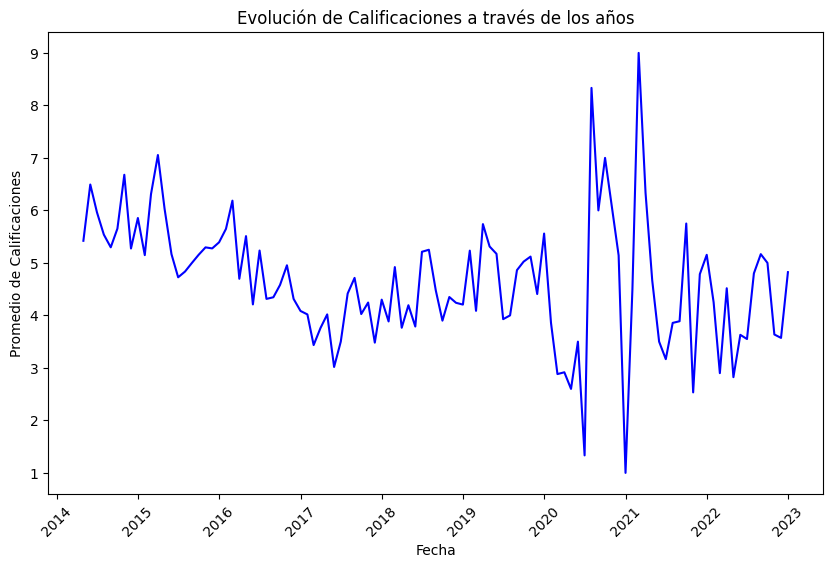

In [170]:
#se agrega una columna 'fecha' que representa (año / mes) ya que si se dejaba tambien el día habría demasiadas variables y era dificil de analizar.
rates_by_date_grouped['fecha'] = pd.to_datetime(rates_by_date_grouped['año'].astype(str) + '-' + rates_by_date_grouped['mes'].astype(str), format='%Y-%m')
rates_by_date_grouped = rates_by_date_grouped.sort_values('fecha')

#se crea un lineplot con la evolución de las calificaciones a lo largo de los últimos años.
plt.figure(figsize=(10, 6))
plt.plot(rates_by_date_grouped['fecha'], rates_by_date_grouped['rates'], color='#0000FF', linestyle='-')

plt.title('Evolución de Calificaciones a través de los años')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Calificaciones')
plt.xticks(rotation=45)

***Conclusión:***
<br>Inicialmente el promedio de calificaciones fue positivo, luego tuvo períodos de baja alrededor de 2017. Entre 2020 y 2021 se detectan picos anormales (positivos y negativos), esto puede deberse a que en alguna fecha específica hubo poco volumen de calificaciones, lo que provocó esos datos llamativos.

# **Anticipación de compra**

---

In [157]:
df_anticipacion = customer_airways.copy()
df_anticipacion.drop(['num_passengers','trip_type','flight_hour','flight_day','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','flight_duration'], axis=1, inplace=True)

<ipython-input-176-ddee8cbeca52>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



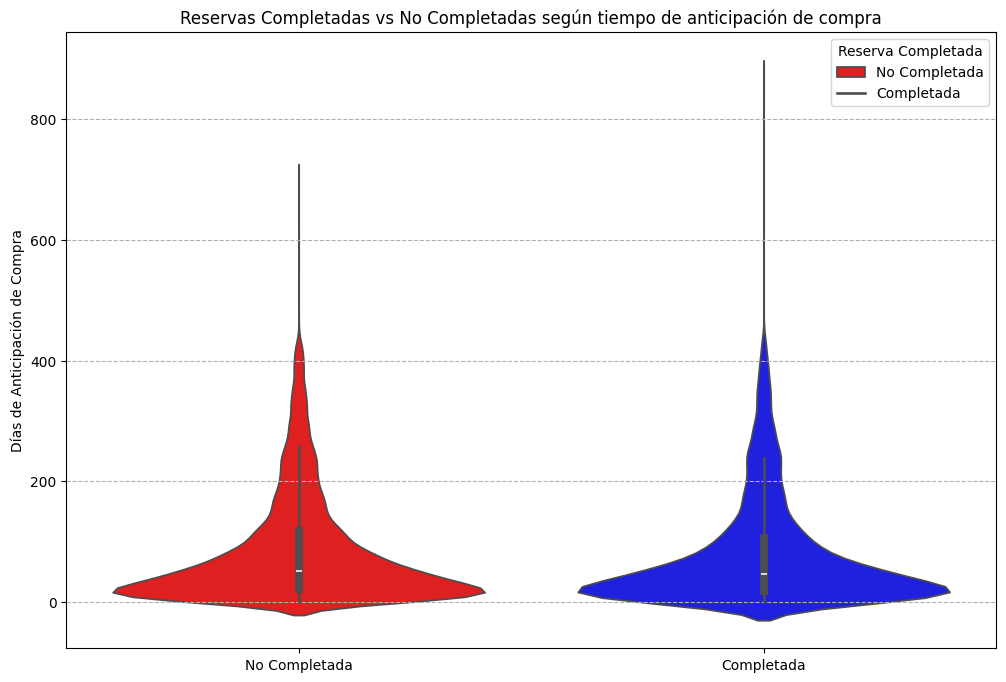

In [176]:
#se realiza violin para visualizar la relación entre anticipación de compra y confirmación de la misma para todas las reservas

plt.figure(figsize=(12, 8))

color = ["#FF0000", "#0000FF"]

violin_general = sns.violinplot(x='booking_complete', y='purchase_lead', data=df_anticipacion, hue='booking_complete', palette=color)
violin_general.set_xticklabels(['No Completada', 'Completada'])
plt.title('Reservas Completadas vs No Completadas según tiempo de anticipación de compra')
plt.xlabel('')
plt.ylabel('Días de Anticipación de Compra')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Reserva Completada', loc='upper right', labels=['No Completada', 'Completada'])
plt.show()

***Conclusión:***
<br>No se detecta una relación definida entre la anticipación y la confirmación de la reserva. Sólo se podría decir que cuando la distancia al viaje es mayor a 400 días, es improbable que se confirme una reserva. Y cuando se buscan pasajes con menos de 100 días es muy probable que llegue a completarse la reserva.

**Anticipación de Compra Australia**

---

In [ ]:
#se busca conocer la relación entre el anticipo de reserva y la confirmación de
#la misma para las reservas con origen Australia (país con mayor cantidad de intentos de reserva).
df_anticipacion_australia = df_anticipacion.loc[df_anticipacion['booking_origin'] == 'Australia',:].reset_index()
df_anticipacion_australia.drop('index',axis=1, inplace=True)

<ipython-input-177-c845666b8ef6>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



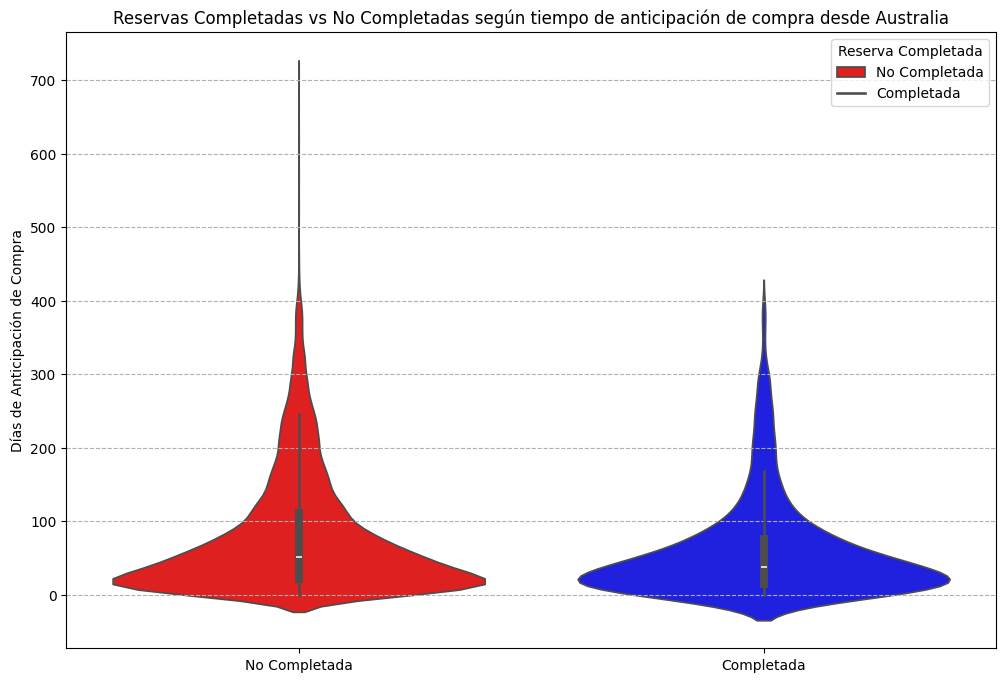

In [177]:
#se realiza violinplot para visualizar la relación entre anticipación de compra y confirmación de la misma para reservas procedentes de Australia

plt.figure(figsize=(12, 8))

color = ["#FF0000", "#0000FF"]

violin_general = sns.violinplot(x='booking_complete', y='purchase_lead', data=df_anticipacion_australia, hue='booking_complete', palette=color)
violin_general.set_xticklabels(['No Completada', 'Completada'])
plt.title('Reservas Completadas vs No Completadas según tiempo de anticipación de compra desde Australia')
plt.xlabel('')
plt.ylabel('Días de Anticipación de Compra')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Reserva Completada', loc='upper right', labels=['No Completada', 'Completada'])
plt.show()

***Conclusión:***
<br>En el caso de Australia, que son los que más intentos de reserva tienen, se puede apreciar que las reservas realizadas con más de 200 dias de anticipación son casi imposible que terminen en confirmación. La mayoría de las ***reservas confirmadas*** se realizan con ***menos de 100 días*** de anticipo.

**Anticipación de Compra Malasia**

---

In [ ]:
#de la misma manera se busca conocer la relación entre el anticipo de reserva y la confirmación de
#la misma para las reservas con origen Malasia (2do país con mayor cantidad de intentos de reserva).
df_anticipacion_malasia = df_anticipacion.loc[df_anticipacion['booking_origin'] == 'Malaysia',:].reset_index()
df_anticipacion_malasia.drop('index',axis=1, inplace=True)

<ipython-input-175-aebb878bf8ea>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



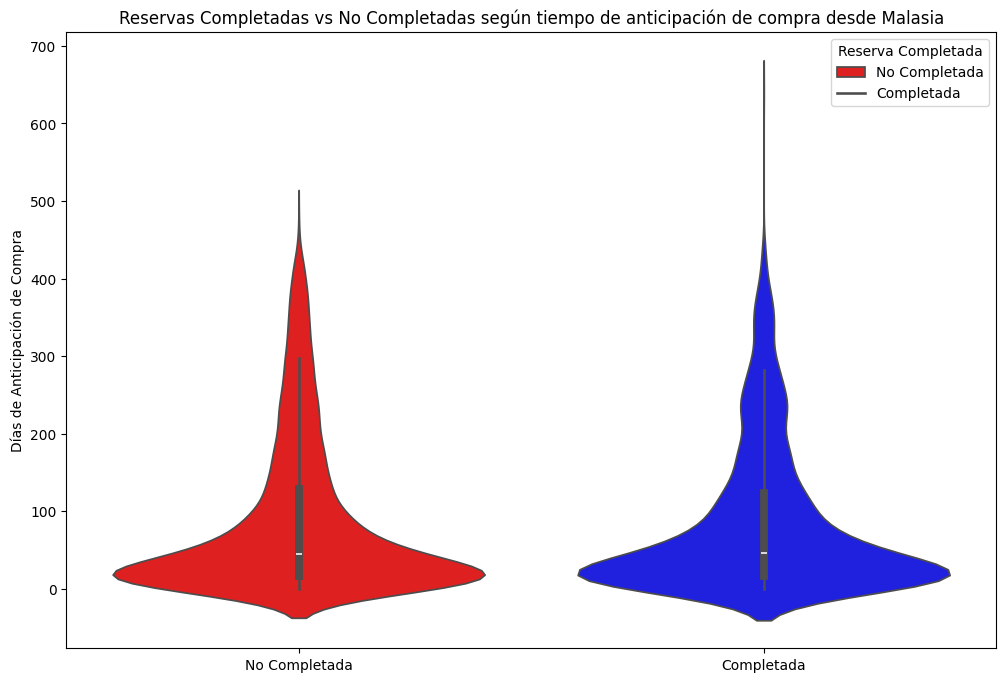

In [175]:
#se realiza violinplot para visualizar la relación entre anticipación de compra y confirmación de la misma para reservas procedentes de Malasia

plt.figure(figsize=(12, 8))

color = ["#FF0000", "#0000FF"]

violin_general = sns.violinplot(x='booking_complete', y='purchase_lead', data=df_anticipacion_malasia, hue='booking_complete', palette=color)
violin_general.set_xticklabels(['No Completada', 'Completada'])
plt.title('Reservas Completadas vs No Completadas según tiempo de anticipación de compra desde Malasia')
plt.xlabel('')
plt.ylabel('Días de Anticipación de Compra')
plt.legend(title='Reserva Completada', loc='upper right', labels=['No Completada', 'Completada'])
plt.show()

***Conclusión:***
<br>En el caso de Malasia, se puede ver que una gran similitud entre la anticipación de intentos de reserva con las reservas completadas. Se podría considerar que desde este origen hay una ***mayor decisión al momento de reservar***. Las confirmaciones por lo general se hacen ***hasta un poco más de 100 días*** antes del viaje.

# **Requisitos de Reserva**

---

In [ ]:
df_requisitos = customer_airways_cuant.copy()

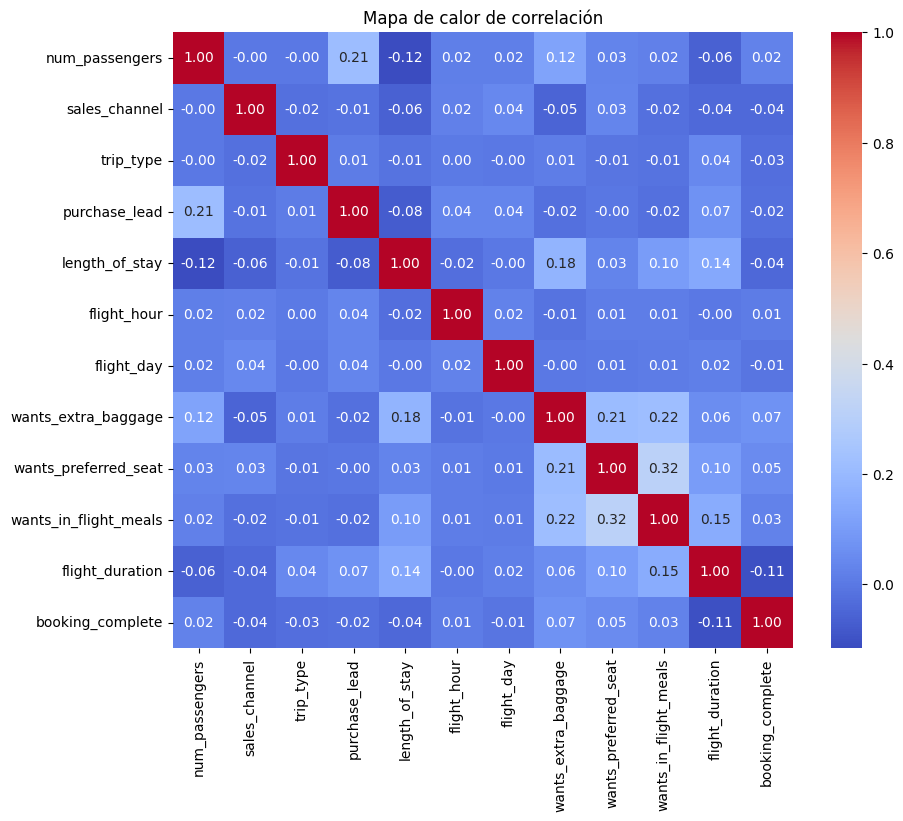

In [ ]:
#se procede a realizar un heatmap para ver si existe alguna correlacion entre los diferentes requisitos y la confirmación de reserva
matriz_correlacion_req = df_requisitos.corr()

#se realiza el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_req, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

***Conclusión:***
<br>No se detecta que exista una correlación entre los requisitos de viaje y la confirmación de una reserva.

# **Cantidad de Pasajeros**

---

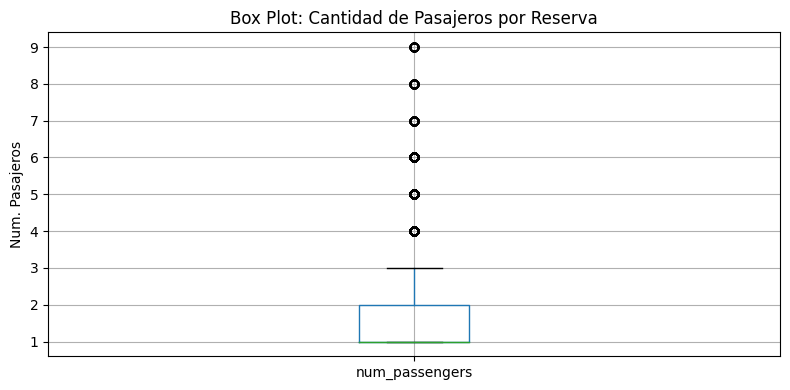

In [ ]:
#se realiza boxplot para visualizar la distribución de la cantidad de pasajeros por reserva
plt.figure(figsize=(8,4))
customer_airways.boxplot(column=['num_passengers'])

plt.title('Box Plot: Cantidad de Pasajeros por Reserva')
plt.ylabel('Num. Pasajeros')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

La mayoría de las reservas tienen 1 o 2 pasajeros. Se prosigue a analizar las reservas confirmadas para individuales (1 o 2 pax) vs grupales (más de 2 pax)

**Reservas completas vs incompletas según numero de pasajeros**

---

In [ ]:
customer_airways_small_groups = customer_airways.loc[customer_airways['num_passengers'] <= 2]
customer_airways_big_groups = customer_airways.loc[customer_airways['num_passengers'] > 2]

**Se analizan las confirmaciones para reservas grupales (+3 pasajeros)**

In [ ]:
customer_airways_big_groups = customer_airways_big_groups.reset_index()
customer_airways_big_groups.drop(['total_reservas_completadas','Total pasajeros','total_reservas_origen','index'],axis=1,inplace=True)

In [ ]:
#reservas grupales completadas
customer_airways_big_groups_complete = customer_airways_big_groups.loc[customer_airways_big_groups['booking_complete'] == 1,:]

#reservas grupales no completadas
customer_airways_big_groups_incomplete = customer_airways_big_groups.loc[customer_airways_big_groups['booking_complete'] == 0,:]

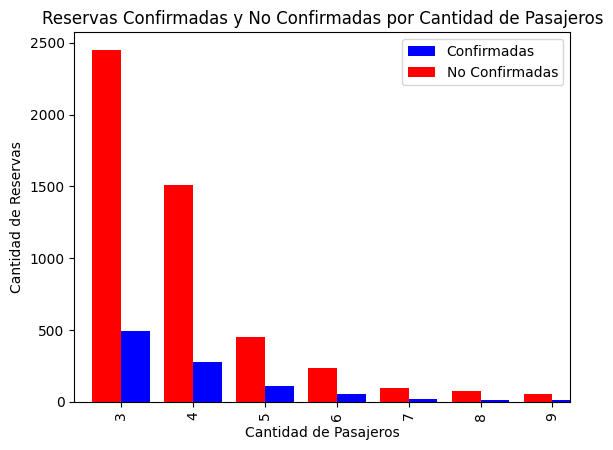

In [ ]:
customer_airways_big_groups_complete_count = customer_airways_big_groups_complete.groupby('num_passengers').size()
customer_airways_big_groups_incomplete_count = customer_airways_big_groups_incomplete.groupby('num_passengers').size()

# Crear gráfico de barras doble
customer_airways_big_groups_complete_count.plot(kind='bar', color='blue', width=0.4, position=0, label='Confirmadas')
customer_airways_big_groups_incomplete_count.plot(kind='bar', color='red', width=0.4, position=1, label='No Confirmadas')

# Configurar el gráfico
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Cantidad de Reservas')
plt.title('Reservas Confirmadas y No Confirmadas por Cantidad de Pasajeros')
plt.legend()

# Mostrar el gráfico
plt.show()

**Se analizan las confirmaciones para reservas individuales (1 o 2 pasajeros)**

In [ ]:
#reservas individuales completadas
customer_airways_small_groups_complete = customer_airways_small_groups.loc[customer_airways_small_groups['booking_complete'] == 1,:]

#reservas individuales no completadas
customer_airways_small_groups_incomplete = customer_airways_small_groups.loc[customer_airways_small_groups['booking_complete'] == 0,:]

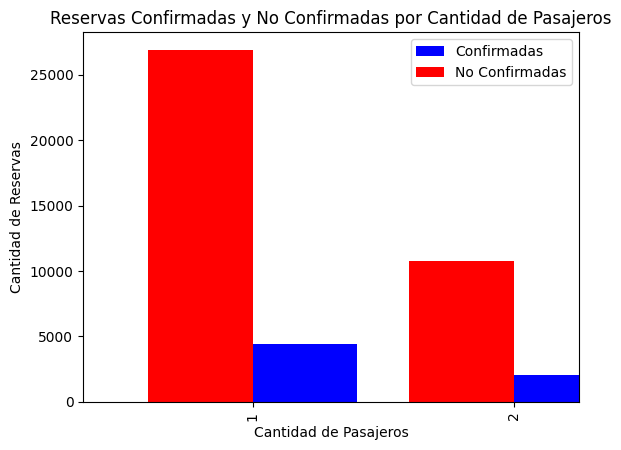

In [ ]:
customer_airways_small_groups_complete_count = customer_airways_small_groups_complete.groupby('num_passengers').size()
customer_airways_small_groups_incomplete_count = customer_airways_small_groups_incomplete.groupby('num_passengers').size()

# Crear gráfico de barras doble
customer_airways_small_groups_complete_count.plot(kind='bar', color='blue', width=0.4, position=0, label='Confirmadas')
customer_airways_small_groups_incomplete_count.plot(kind='bar', color='red', width=0.4, position=1, label='No Confirmadas')

# Configurar el gráfico
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Cantidad de Reservas')
plt.title('Reservas Confirmadas y No Confirmadas por Cantidad de Pasajeros')
plt.legend()

# Mostrar el gráfico
plt.show()

***Conclusión:***
<br>En los gráficos anteriores se puede concluir que cuanto menor es la cantidad de pasajeros, hay más búsquedas pero poco volumen de reservas completadas.

**Se analizan porcentajes en vez de cantidades**

---

In [ ]:
#se realiza una copia del df original
customer_airways_pax = customer_airways.copy()

#se eliminan algunas columnas innecesarias
customer_airways_pax.drop(['total_reservas_completadas','Total pasajeros','total_reservas_origen'],axis=1,inplace=True)

In [ ]:
#se agrega columna con el total de las reservas por numero de pasajeros
customer_airways_pax['total_reservas'] = customer_airways_pax.groupby('num_passengers')['booking_complete'].transform('count')

#se agrega columna con el total de las reservas completadas por numero de pasajeros
customer_airways_pax['total_completadas'] = customer_airways_pax.groupby('num_passengers')['booking_complete'].transform('sum')

#se agrega columna con el porcentaje de reservas completadas por numero de pasajero
customer_airways_pax['porcentaje_completadas'] =  (customer_airways_pax['total_completadas'] * 100) / customer_airways_pax['total_reservas']

In [ ]:
customer_airways_pax.drop_duplicates(subset='num_passengers', inplace=True)
customer_airways_pax.sort_values(by='num_passengers', ascending=True, inplace=True)

In [ ]:
customer_airways_pax

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_reservas,total_completadas,porcentaje_completadas
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,31352,4455,14.209620
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,12804,2051,16.018432
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0,2941,491,16.695002
12,4,Internet,RoundTrip,265,24,19,Mon,AKLDEL,New Zealand,1,0,1,5.52,0,1784,275,15.414798
155,5,Internet,RoundTrip,239,17,12,Thu,AKLKUL,Malaysia,1,0,1,8.83,0,561,109,19.429590
37,6,Internet,RoundTrip,20,22,3,Fri,AKLICN,South Korea,1,1,1,6.62,0,289,54,18.685121
508,7,Internet,RoundTrip,321,17,1,Tue,AKLKUL,Malaysia,1,0,1,8.83,0,114,18,15.789474
870,8,Internet,RoundTrip,110,17,3,Sun,AKLKUL,Malaysia,1,1,0,8.83,1,89,12,13.483146
547,9,Internet,RoundTrip,164,17,7,Fri,AKLKUL,Malaysia,1,0,0,8.83,0,66,13,19.696970


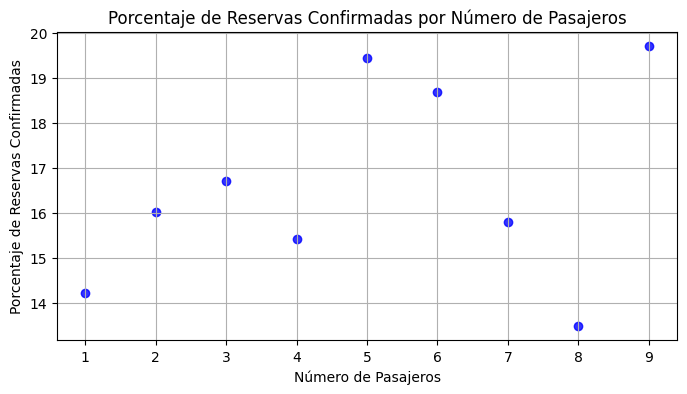

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(customer_airways_pax['num_passengers'], customer_airways_pax['porcentaje_completadas'], color='blue', alpha=0.8)

# Agregar etiquetas y título
plt.title('Porcentaje de Reservas Confirmadas por Número de Pasajeros')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Porcentaje de Reservas Confirmadas')

# Mostrar el gráfico
plt.grid(True)
plt.show()

***Conclusión:***
<br>Se puede observar que las reservas individuales tienen menor posibilidad de convertirse en confirmadas.

<br>El caso de grupos de 9 pasajeros parece ser el que tiene más probabilidad de confirmación, pero se debe ser cuidadoso con este dato ya que el numero de reservas para tal cantidad de personas es muy bajo. El mismo caso (en este caso negativo) es para reservas de 8 pasajeros.